In [39]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

**Visualize Raw (Uncleaned) Data**

**2.1 Missing Values Heatmap**

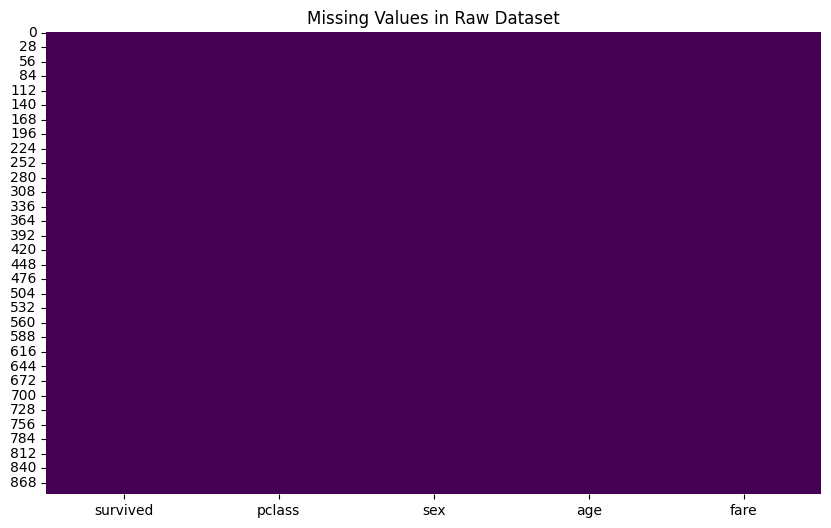

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Raw Dataset")
plt.show()


**2.2 Survival Count Plot**

In [62]:
sns.countplot(x='survived', data=df)
plt.title("Count of Survived vs Not Survived")
plt.xlabel("Survived (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

# Count of passengers who survived (1) and who died (0)
df['survived'].value_counts()


survived
0    549
1    342
Name: count, dtype: int64

**2.3 Survival by Gender**

In [53]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()


**EDA (EXPORATOY DAT ANALYSIS
)**

In [40]:
print("shape: ", df.shape)

shape:  (891, 15)


In [41]:
print("summary:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
summary: None


In [42]:
#for missing
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Data Cleaning**

In [55]:
df_clean = df[['survived','pclass','sex', 'age','fare']]


In [56]:
#as we took age which have missing vales to we treet age by median of all these and fill them
df_clean['age'] = df['age'].fillna(df['age'].median())

In [57]:
#as we have sex column which is categorical and convert it into numerical
df_clean['sex'] = df['sex'].map({'male': 0, 'female': 1})

**4: Visualize Cleaned Data**

**4.1 Check Missing Values Again**



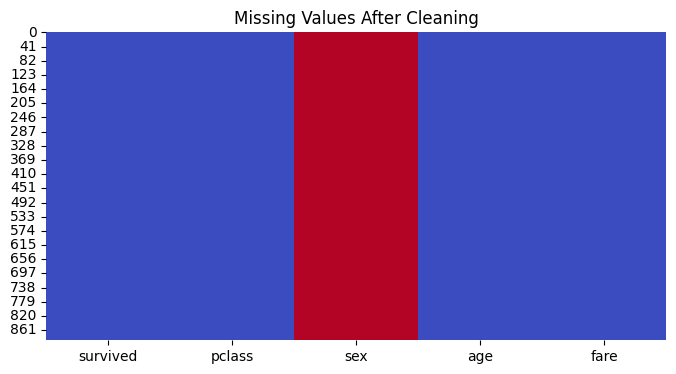

In [58]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_clean.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values After Cleaning")
plt.show()


**4.2 Age Distribution After Cleaning**



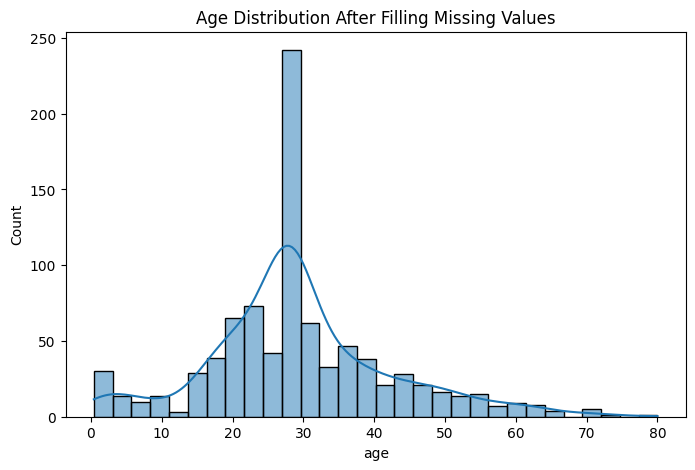

In [59]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title("Age Distribution After Filling Missing Values")
plt.show()


Split the **dataset**

In [46]:
from sklearn.model_selection import train_test_split

#we have feature and target

x = df.drop('survived', axis =1)
y = df['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Train a Classification Model**

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

** Evaluate the Model**

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

#predict y
y_pred = model.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8044692737430168
Confusion matrix: 
 [[90 15]
 [20 54]]
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

